## Seaborn

![seaborn](https://drive.google.com/uc?id=1j1ZM-tMaWYNCa_YkMGFIfymcrLS0MWG3)


- 엄청나게 화려한 시각화 기법들을 제공하며, 기본적으로 이쁩니다.
>  histplot, barplot, jointplot, lineplot, ...


- pandas DataFrame과 매우 호환이 잘 됩니다.

  >  e.g. sns.xxxplot(data=df)    **<--- 기본세팅!**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 라이브러리와 데이터를 불러오고, 시각화를 위한 세팅을 합니다.
data = sns.load_dataset('penguins')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [3]:
data.loc[data.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [4]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [5]:
# 폰트 설정 방법 2
import matplotlib
import matplotlib.font_manager as fm

#plt.rc('font',family='AppleGothic')
# font_location = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font_location = 'C:/Windows/Fonts/Malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
matplotlib.rc('font', family=font_name)

Malgun Gothic


In [6]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


# 기본형태
## sns.----plot(data= , x= , y= , hue=)

### Histplot

- 가장 기본적으로 사용되는 히스토그램을 출력하는 plot.


- 전체 데이터를 특정 구간별 정보를 확인할 때 사용합니다.

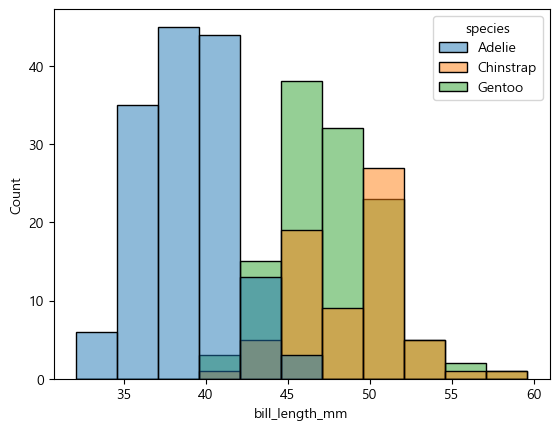

In [7]:
# penguin 데이터에 histplot을 출력합니다.
sns.histplot(data=data, x='bill_length_mm',hue='species')
plt.show()

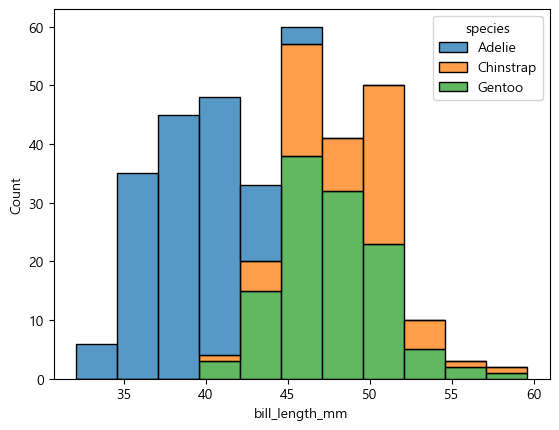

In [8]:
sns.histplot(data=data, x='bill_length_mm',hue='species', multiple='stack')
plt.show()

### Displot 

- distribution들을 여러 subplot들로 나눠서 출력해주는 plot.


- displot에 kind를 변경하는 것으로, histplot, kdeplot, ecdfplot 모두 출력이 가능합니다.

e.g. displot(kind="hist")

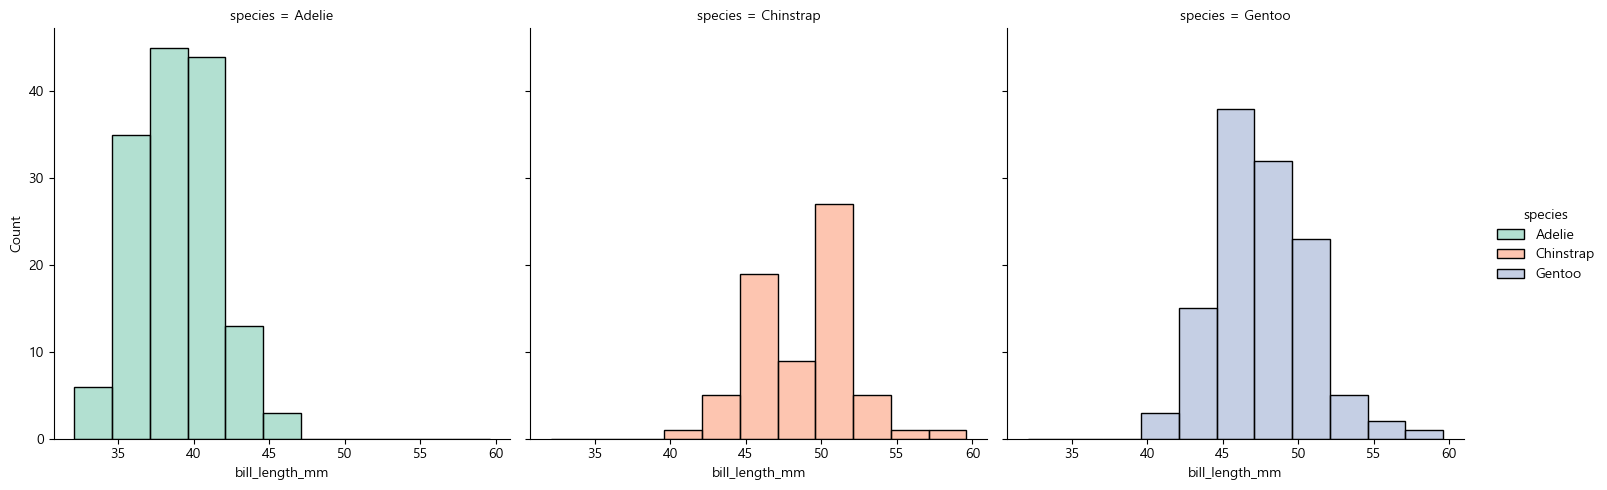

In [9]:
# penguin 데이터에 displot을 출력합니다.
sns.displot(
    data=data,
    x='bill_length_mm',
    col='species',
    kind='hist',
    hue='species',
    palette='Set2'
)
plt.show()

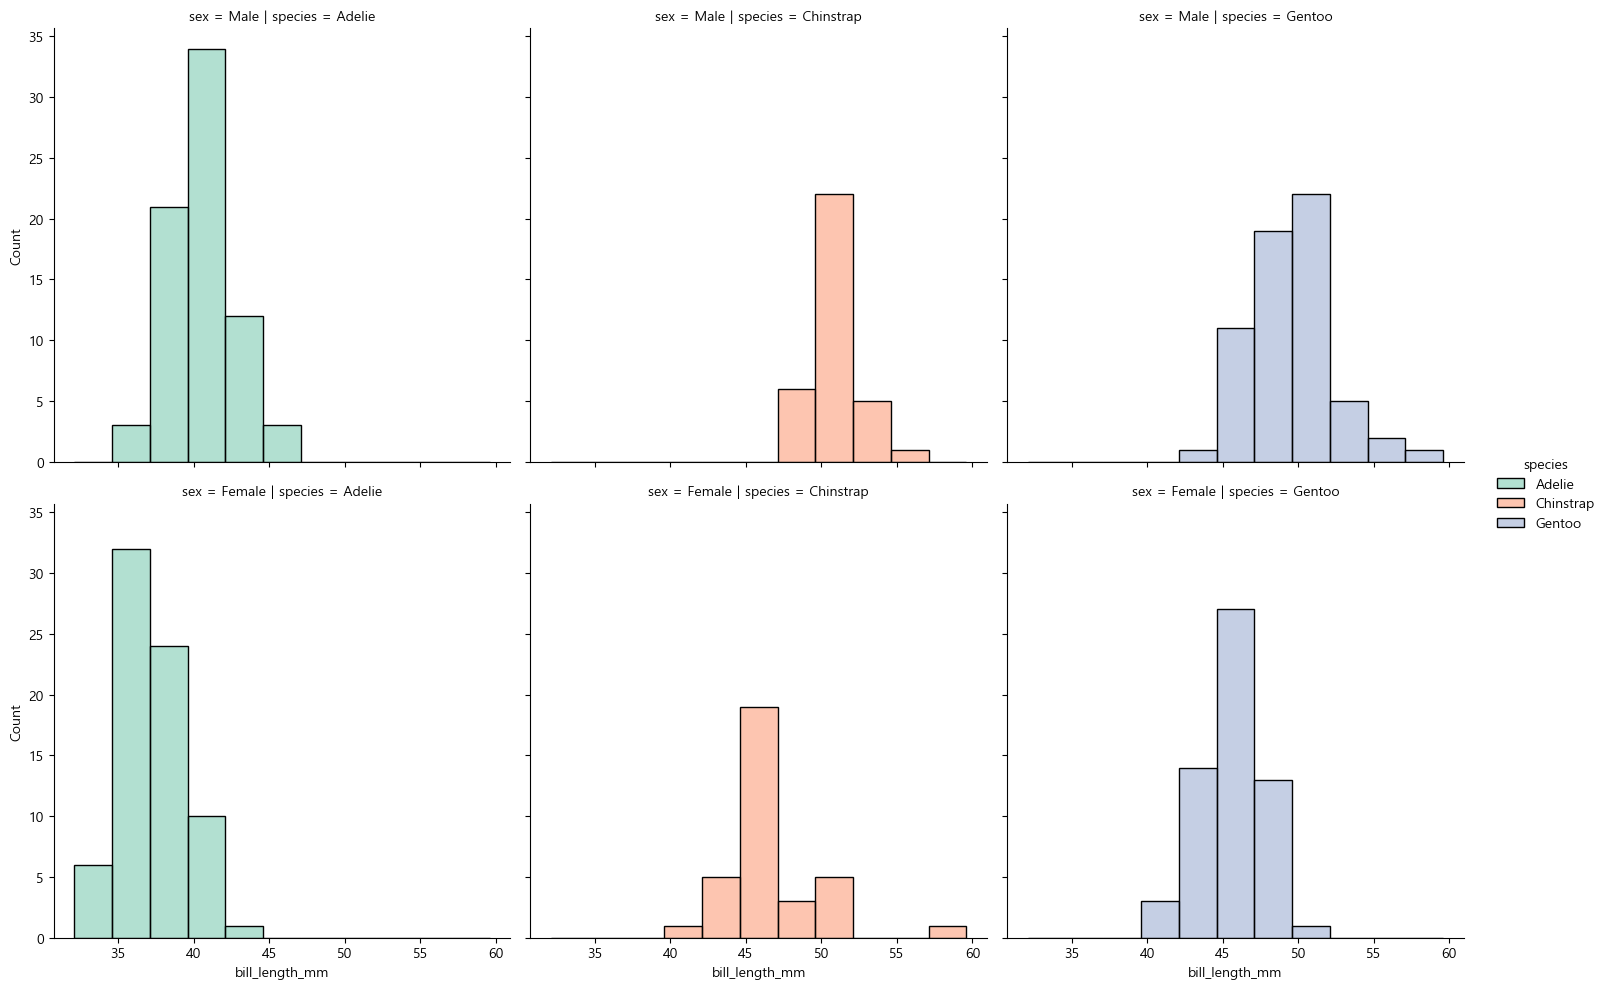

In [10]:
sns.displot(
    data=data,
    x='bill_length_mm',
    row='sex',
    col='species',
    kind='hist',
    hue='species',
    palette='Set2'
)
plt.show()

### Barplot

- 어떤 데이터에 대한 값의 크기를 막대로 보여주는 plot. (a.k.a. 막대그래프)


- 가로 / 세로 두 가지로 모두 출력 가능합니다.


- 히스토그램과는 다릅니다!

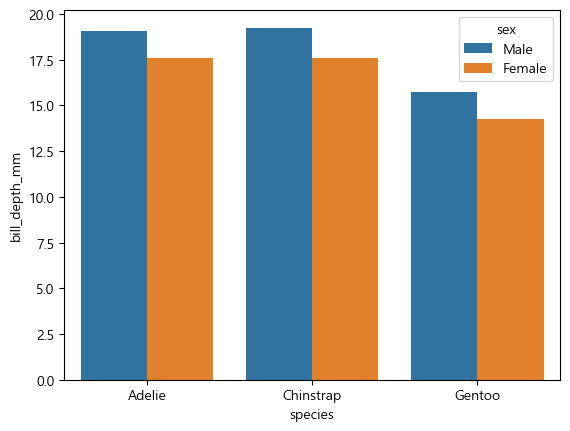

In [11]:
# penguin 데이터에 barplot을 출력합니다.
sns.barplot(data=data,x='species',y='bill_depth_mm',hue='sex', errorbar=None)
plt.show()

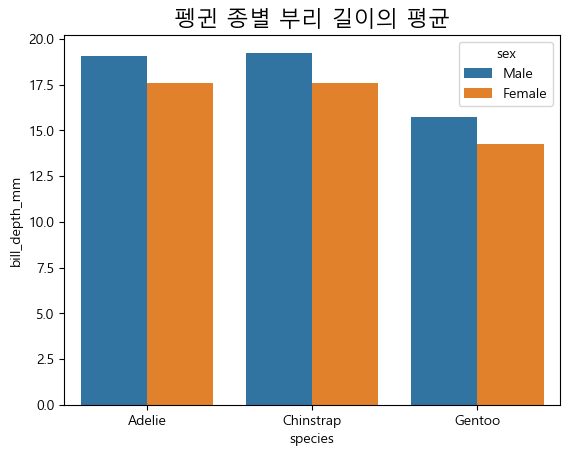

In [12]:
sns.barplot(data=data,x='species',y='bill_depth_mm',hue='sex', errorbar=None)
plt.title('펭귄 종별 부리 길이의 평균', fontsize=16)
plt.show()

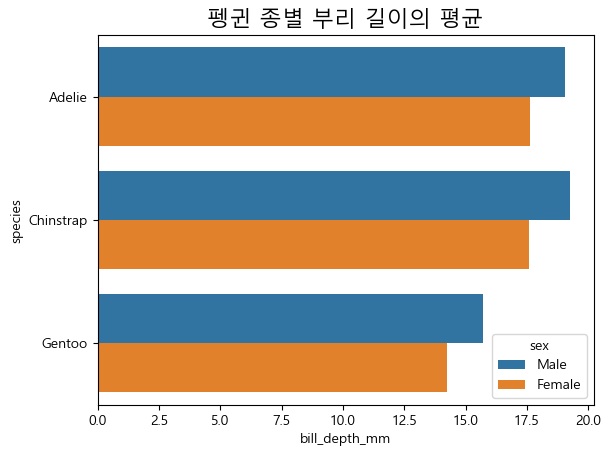

In [13]:
sns.barplot(data=data,y='species',x='bill_depth_mm',hue='sex', errorbar=None)
plt.title('펭귄 종별 부리 길이의 평균', fontsize=16)
plt.show()

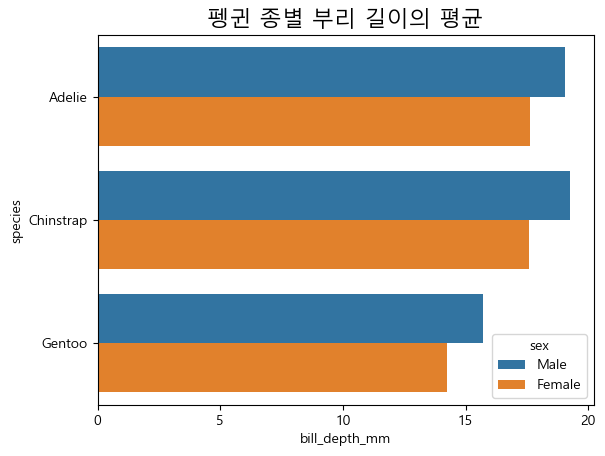

In [14]:
sns.barplot(data=data,y='species',x='bill_depth_mm',hue='sex', errorbar=None)
plt.title('펭귄 종별 부리 길이의 평균', fontsize=16)
plt.xticks([0,5,10,15,20])
plt.savefig('sample_barplot.png')
plt.show()

### Countplot

- 범주형 속성을 가지는 데이터들의 histogram을 보여주는 plot.



- 종류별 count를 보여주는 방법입니다.

<Axes: xlabel='sex', ylabel='count'>

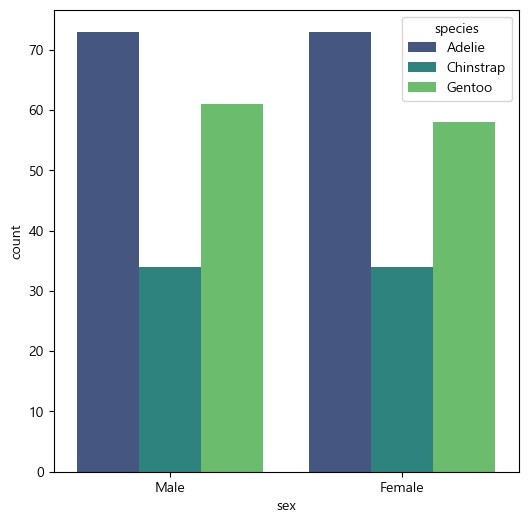

In [15]:
# penguin 데이터에 countplot을 출력합니다.
plt.figure(figsize=(6,6))
sns.countplot(data=data, x='sex', hue='species', palette='viridis')

### Boxplot


- 데이터의 각 종류별로 사분위 수(quantile)를 표시하는 plot.


- 특정 데이터의 전체적인 분포를 확인하기 좋은 시각화 기법입니다.


- box와 전체 range의 그림을 통해 outlier를 찾기 쉽습니다. (IQR : Inter-Quantile Range)

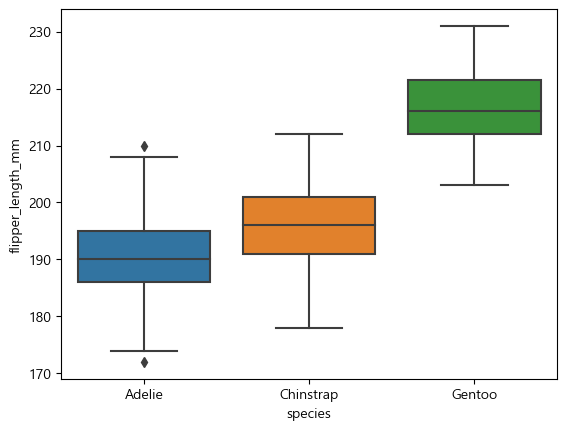

In [16]:
# penguin 데이터에 boxplot을 출력합니다.
sns.boxplot(data=data, x='species', y='flipper_length_mm')
plt.show()

### Lineplot

- 특정 데이터를 x, y로 표시하여 관계를 확인할 수 있는 plot. (선 그래프)


- 수치형 지표들 간의 경향을 파악할 때 많이 사용합니다.

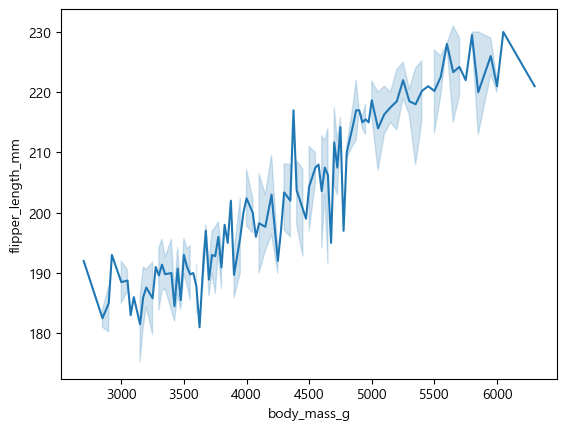

In [24]:
# penguin 데이터에 lineplot을 출력합니다.
sns.lineplot(
    data=data,
    x='body_mass_g',
    y='flipper_length_mm'
)
plt.show()

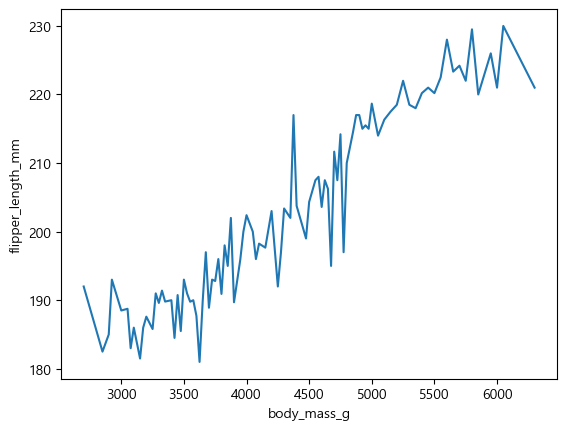

In [25]:
sns.lineplot(
    data=data,
    x='body_mass_g',
    y='flipper_length_mm',
    errorbar=None)
plt.show()

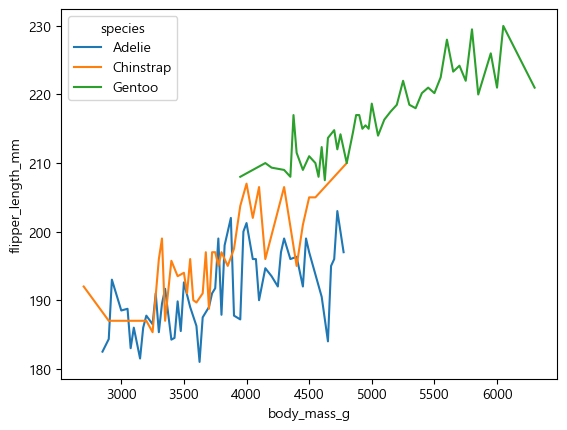

In [26]:
sns.lineplot(
    data=data,
    x='body_mass_g',
    y='flipper_length_mm',
    hue='species',
    errorbar=None
)
plt.show()

### Scatterplot

- lineplot과 비슷하게 x, y에 대한 전체적인 분포를 확인하는 plot.


- lineplot은 경향성에 초점을 둔다면, scatterplot은 데이터 그 자체가 퍼져있는 모양에 중점을 둡니다.

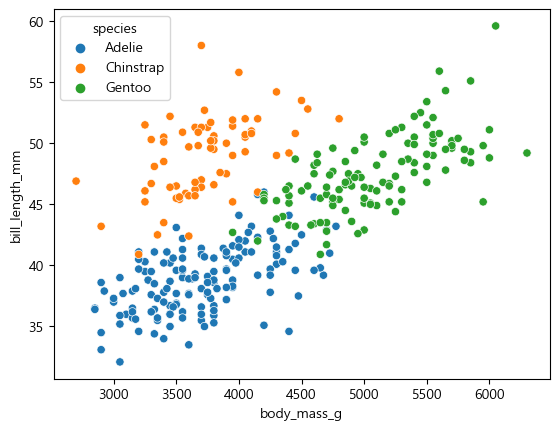

In [28]:
# penguin 데이터에 scatterplot을 출력합니다.
sns.scatterplot(data=data, x='body_mass_g',y='bill_length_mm',hue='species')
plt.show()

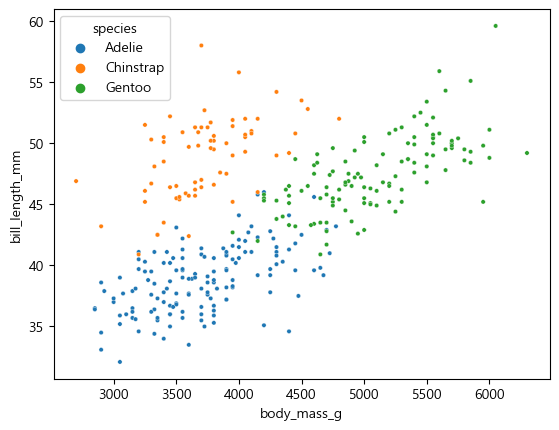

In [30]:
sns.scatterplot(
    data=data,
    x='body_mass_g',
    y='bill_length_mm',
    hue='species',
    s=10
)
plt.show()

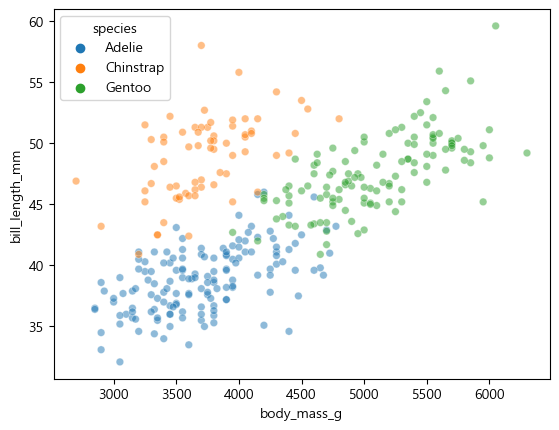

In [33]:
sns.scatterplot(
    data=data,
    x='body_mass_g',
    y='bill_length_mm',
    hue='species',
    s=30,
    alpha=0.5
)
plt.show()

### Pairplot


- 주어진 데이터의 각 feature들 사이의 관계를 표시하는 Plot.


- scatterplot, FacetGrid, kdeplot을 이용하여 feature간의 관계를 잘 보여줍니다.


- 각 feature에 대해 계산된 모든 결과를 보여주기 때문에, feature가 많은 경우 사용하기 적합하지 않습니다.

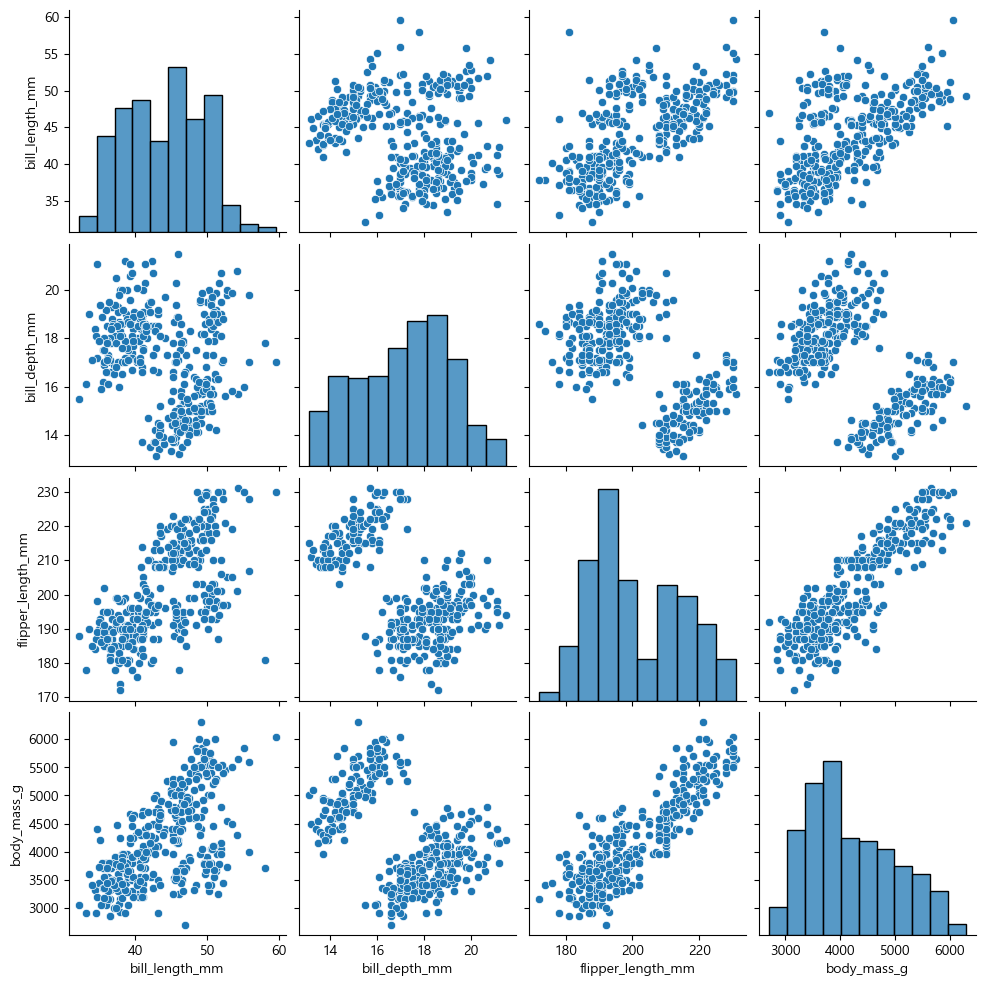

In [35]:
# penguin 데이터에 pairplot을 출력합니다.
sns.pairplot(data=data)
plt.show()

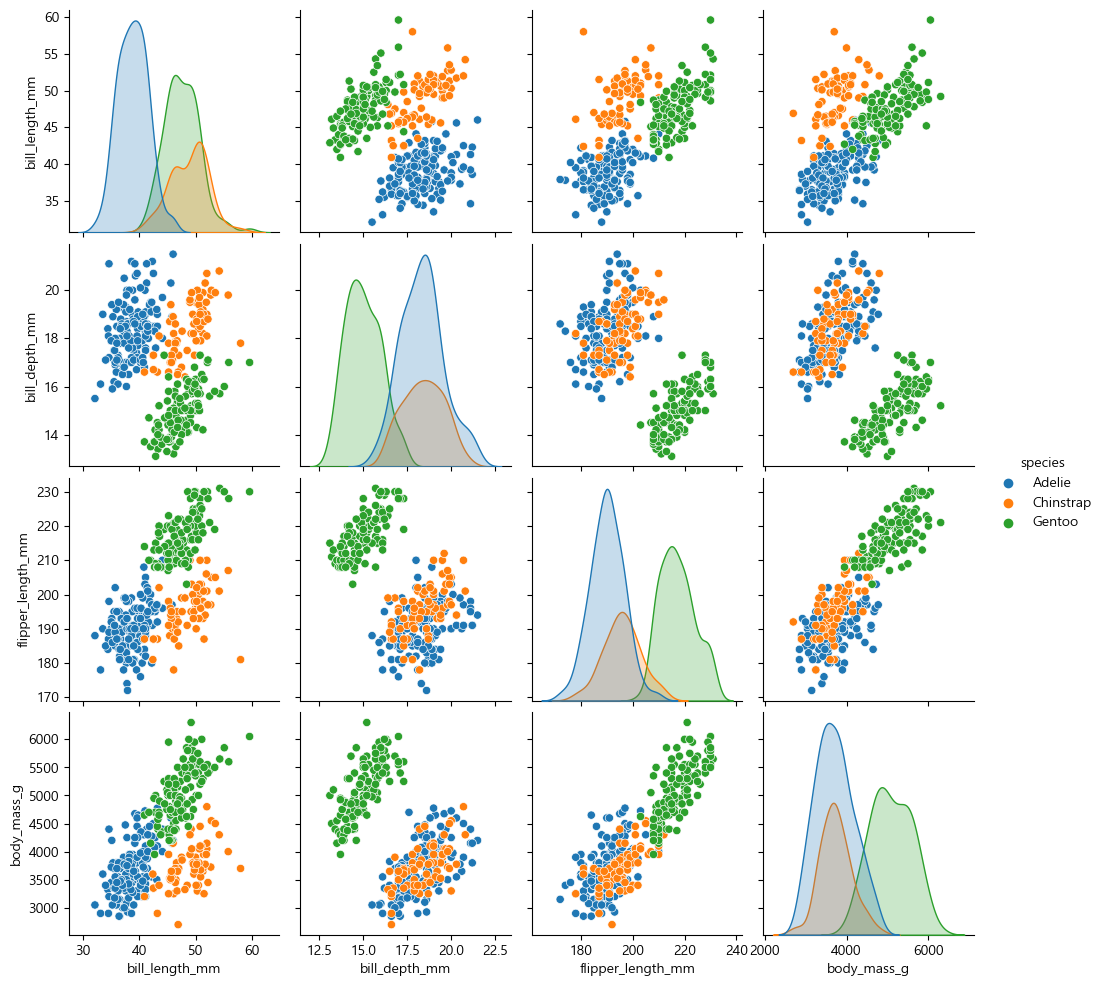

In [37]:
sns.pairplot(data=data, hue='species')
plt.show()

### Heatmap

- 정사각형 그림에 데이터에 대한 정도 차이를 색 차이로 보여주는 plot.


- 말 그대로 heatmap이기 때문에, 열화상카메라로 사물을 찍은 것처럼 정보의 차이를 보여줍니다.


- pairplot과 비슷하게 feature간 관계를 시각화할 때 많이 사용합니다.

**상관관계란?**
- 어떤 X값의 변화에 따라 Y값의 선형적으로 변화하는지를 측정한 지표.

- [-1, 1]


e.g. 아이스크림 판매량 증가 <----> 상어에 물린 사람 수

In [20]:
# 각 feature간 상관관계를 파악하기 위해 Correlation matrix를 만듭니다.
corr = data.loc[:, ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].corr()
corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


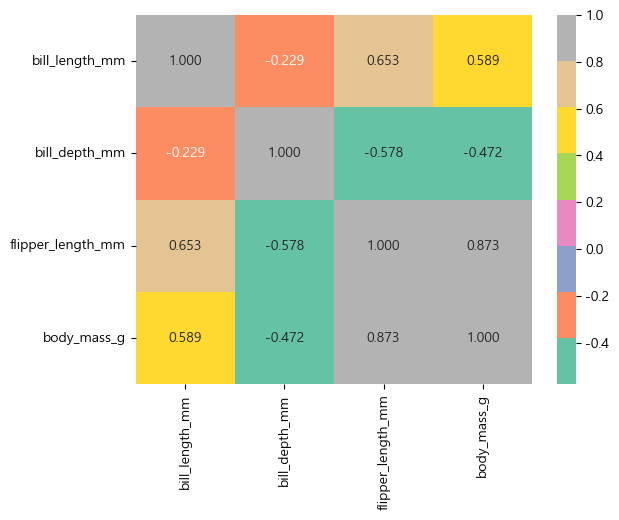

In [40]:
# penguin 데이터에 heatmap을 출력합니다.
sns.heatmap(data=corr, annot=True, fmt='.3f', cmap='Set2')
plt.rcParams['axes.unicode_minus'] = False
plt.show()

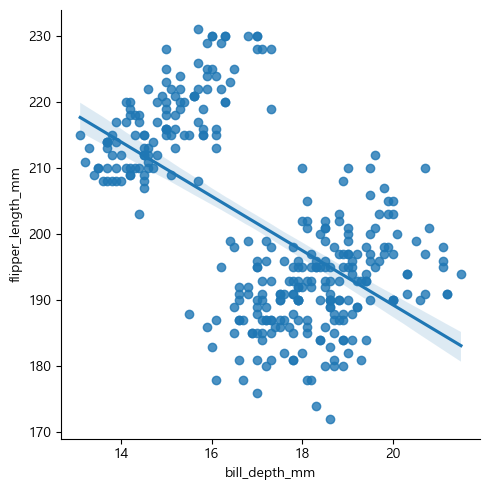

In [38]:
sns.lmplot(
    data=data,
    x='bill_depth_mm',
    y='flipper_length_mm'
)
plt.show()

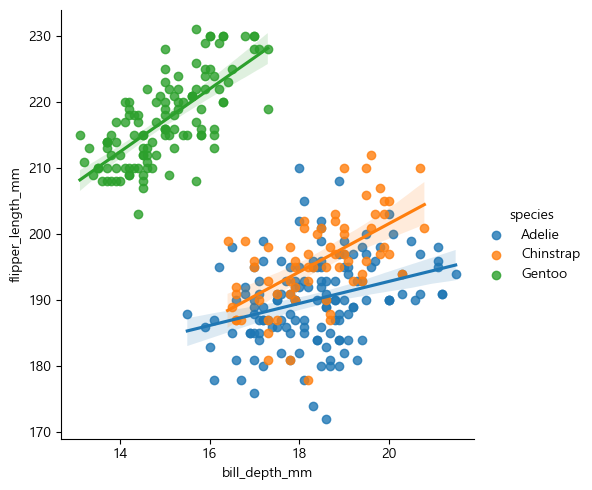

In [22]:
# sns.scatterplot(data=data, x='bill_depth_mm',y='flipper_length_mm', hue='species', )
sns.lmplot(
    data=data,
    x='bill_depth_mm',
    y='flipper_length_mm',
    hue='species'
)
plt.show()